# Árvores de Decisão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./dados/dados.csv') #Lendo os dados

In [2]:
#Declarando as variáveis:
X = df[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Chuva (mm)', 'Hora', 'Mês', 'Pto Orvalho Ins. (C)', 'Temp. Max. (C)',
       'Temp. Min. (C)']]

y = df['Potência CA (W)']


#Separando em treino e teste:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=101) #10% dos dados são p/ teste

# Validação Cruzada

In [3]:
#Criando o modelo (não precisa de pipeline porque não é necessário normalizar os dados):
reg = DecisionTreeRegressor(min_samples_leaf=16) 


#Declarando a Validação Cruzada:
cross_validation = KFold(n_splits=4, shuffle=True, random_state=101)

#Rodando a Validação Cruzada e calculando o RMSE:
print('RMSE:', cross_val_score(reg, X_t, y_t, cv=cross_validation, scoring='neg_root_mean_squared_error').mean())

RMSE: -366.16330560206336


## Obtendo as métricas para os hiperparâmetros escolhidos

In [4]:
#Separando em treino e validação:
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.3, random_state=101)


#Treinando o modelo:
reg.fit(X_train, y_train)

#Fazendo a previsão:
pred = reg.predict(X_test)


#Avaliando o modelo:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, pred))
print('R²:', metrics.r2_score(y_test, pred))
print(reg.get_depth())

RMSE: 399.4776195683641
MAPE: 1.3621478239592113
R²: 0.7756544219083977
14


# Prevendo os dados de teste

In [5]:
#Treinando o modelo:
reg.fit(X_t, y_t)

#Fazendo a previsão:
pred = reg.predict(X_test)


#Avaliando o modelo:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, pred))
print('R²:', metrics.r2_score(y_test, pred))

RMSE: 384.96177979175184
MAPE: 1.231271778119835
R²: 0.7916623148683448


<AxesSubplot:xlabel='Valor Real', ylabel='Previsão'>

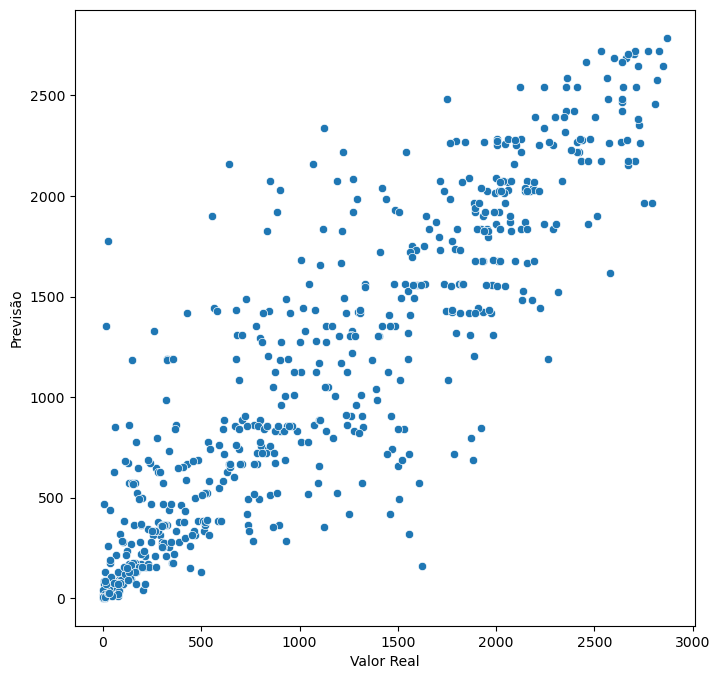

In [31]:
plt.figure(figsize=(8,8))
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
sns.scatterplot(y_test,pred)

In [32]:
pred_table = pd.DataFrame({'Valor': y_test, 'Previsão': pred, 'Erro': pred-y_test})

pred_table.head(10)

,Valor,Previsão,Erro
2989,1298.800000,1423.296212,124.496212
3644,2411.333333,2267.696281,-143.637052
3296,2173.416667,2026.725694,-146.690972
96,1222.000000,2220.697727,998.697727
1884,1922.750000,1834.600622,-88.149378
4928,107.727273,83.447330,-24.279942
2102,174.500000,168.864583,-5.635417
3789,120.583333,128.624801,8.041467
2464,10.800000,2.416129,-8.383871
183,873.416667,1123.160124,249.743457


In [33]:
print((np.sqrt(metrics.mean_squared_error(y_test, pred)))/(df['Potência CA (W)'].mean()))

0.35664776299263173
